In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
pizza_ingredients = pd.read_csv("Pizza_ingredients.csv")
pizza_sales = pd.read_csv("Pizza_sales.csv")


In [78]:
print("Missing values in pizza_sales:\n", pizza_sales.isnull().sum())
print("\nMissing values in pizza_ingredients:\n", pizza_ingredients.isnull().sum())


Missing values in pizza_sales:
 pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

Missing values in pizza_ingredients:
 pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64


In [79]:
print("Duplicate entries in pizza_sales:", pizza_sales.duplicated().sum())
print("Duplicate entries in pizza_ingredients:", pizza_ingredients.duplicated().sum())


Duplicate entries in pizza_sales: 0
Duplicate entries in pizza_ingredients: 0


In [80]:
print("\nData types in pizza_sales:\n", pizza_sales.dtypes)
print("\nData types in pizza_ingredients:\n", pizza_ingredients.dtypes)



Data types in pizza_sales:
 pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

Data types in pizza_ingredients:
 pizza_name_id          object
pizza_name             object
pizza_ingredients      object
Items_Qty_In_Grams    float64
dtype: object


In [81]:
# Drop rows with missing values in pizza_sales
pizza_sales.dropna(inplace=True)

# Check if missing values still exist
print("Remaining missing values in pizza_sales:\n", pizza_sales.isnull().sum())


Remaining missing values in pizza_sales:
 pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64


In [82]:
# Fill missing ingredient quantities with the mean value (avoiding NaN issues in calculations)
pizza_ingredients["Items_Qty_In_Grams"].fillna(pizza_ingredients["Items_Qty_In_Grams"].mean(), inplace=True)

In [86]:
# Convert order_date while letting Pandas infer mixed formats
pizza_sales["order_date"] = pd.to_datetime(pizza_sales["order_date"], dayfirst=True, errors="coerce")

# Extract useful time features
pizza_sales["year"] = pizza_sales["order_date"].dt.year
pizza_sales["month"] = pizza_sales["order_date"].dt.month
pizza_sales["day_of_week"] = pizza_sales["order_date"].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Display the first few rows to confirm changes
pizza_sales.head()


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,year,month,day_of_week
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015.0,1.0,3.0
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015.0,1.0,3.0
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015.0,1.0,3.0
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015.0,1.0,3.0
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015.0,1.0,3.0


In [87]:
# Create a 'weekend' column (1 for weekends, 0 for weekdays)
pizza_sales["weekend"] = pizza_sales["day_of_week"].apply(lambda x: 1 if x in [5, 6] else 0)  # 5 = Saturday, 6 = Sunday

# Display the first few rows to confirm changes
print(pizza_sales[["order_date", "day_of_week", "weekend"]].head())


  order_date  day_of_week  weekend
0 2015-01-01          3.0        0
1 2015-01-01          3.0        0
2 2015-01-01          3.0        0
3 2015-01-01          3.0        0
4 2015-01-01          3.0        0


In [88]:
# Aggregate daily pizza sales
daily_sales = pizza_sales.groupby("order_date")["quantity"].sum().reset_index()

# Display first few rows of aggregated data
daily_sales.head()


,order_date,quantity
0,2015-01-01,156
1,2015-01-02,160
2,2015-01-03,143
3,2015-01-04,92
4,2015-01-05,106


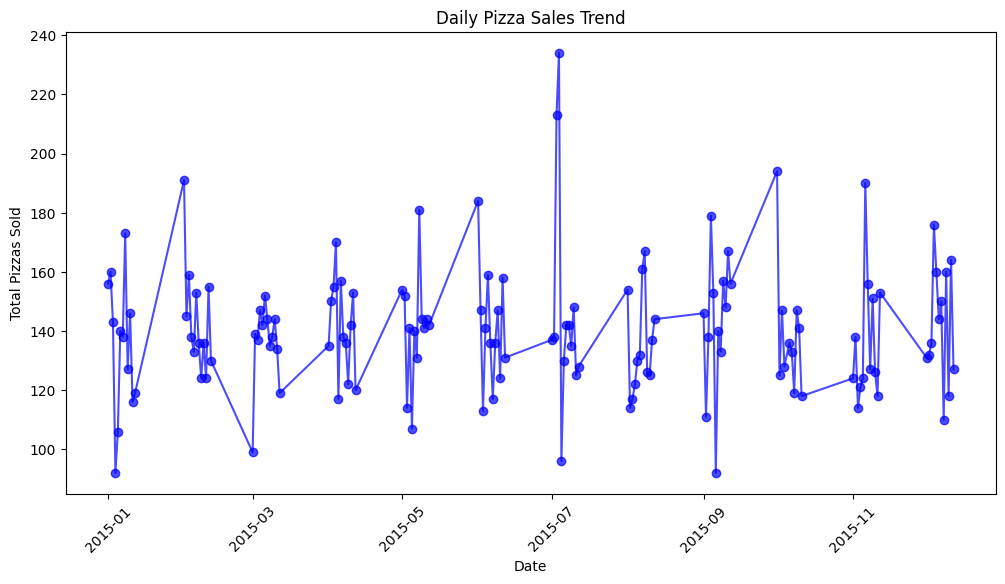

In [89]:
import matplotlib.pyplot as plt

# Create a plot for daily pizza sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales["order_date"], daily_sales["quantity"], marker="o", linestyle="-", color="b", alpha=0.7)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Total Pizzas Sold")
plt.title("Daily Pizza Sales Trend")
plt.xticks(rotation=45)

# Save the plot as a PNG file
plt.savefig("daily_pizza_sales_trend.png", dpi=300)

# Show the plot
plt.show()


In [91]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 6.3 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.8 MB 5.6 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/9.8 MB 5.4 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.8 MB 5.5 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.8 MB 5.3 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.8 MB 5.3 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 5.3 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 5.2 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------

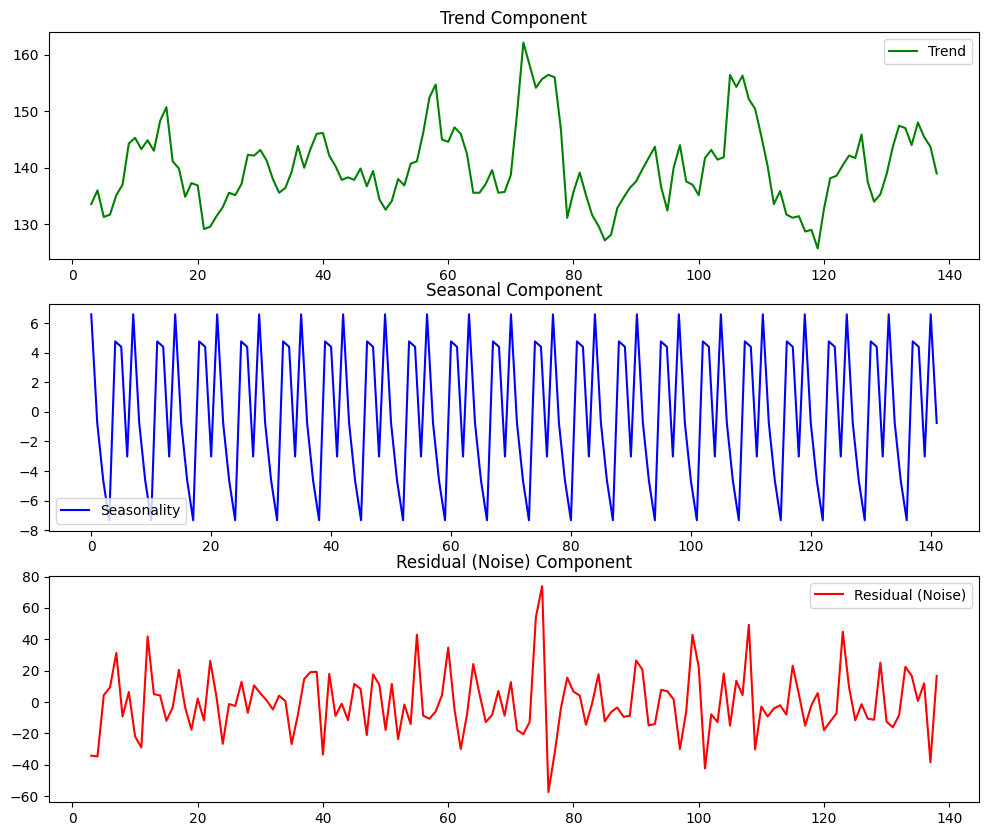

In [92]:
import statsmodels.api as sm

# Perform time-series decomposition
decomposition = sm.tsa.seasonal_decompose(daily_sales["quantity"], model="additive", period=7)  # Weekly seasonality

# Save and plot decomposition components
plt.figure(figsize=(12, 10))

# Trend component
plt.subplot(3, 1, 1)
plt.plot(decomposition.trend, label="Trend", color="green")
plt.title("Trend Component")
plt.legend()

# Seasonal component
plt.subplot(3, 1, 2)
plt.plot(decomposition.seasonal, label="Seasonality", color="blue")
plt.title("Seasonal Component")
plt.legend()

# Residual (noise) component
plt.subplot(3, 1, 3)
plt.plot(decomposition.resid, label="Residual (Noise)", color="red")
plt.title("Residual (Noise) Component")
plt.legend()

# Save the decomposition plot as PNG
plt.savefig("time_series_decomposition.png", dpi=300)

# Show the plot
plt.show()
